## EDA With Red Wine Data

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.252396,0.803230,0.165013,1.589725,0.097481,11.661540,28.392565,0.996796,3.212262,0.647359,9.506666,3
1,6.741406,0.720035,0.100585,1.646685,0.084057,8.606058,35.401428,0.996515,3.302492,0.629257,9.406556,3
2,8.263395,0.776013,0.268897,1.732219,0.087643,7.306807,24.169223,0.996916,3.137254,0.514031,9.377579,3
3,8.832776,0.676016,0.300111,2.298864,0.087419,8.681127,32.106221,0.997116,3.140068,0.631564,9.603399,3
4,5.317646,0.782904,0.061717,2.156970,0.077650,2.250662,15.648956,0.996278,3.355798,0.585052,9.321775,3


In [2]:
## Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
## descriptive summary of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.267719,0.541496,0.285712,2.547600,0.086813,15.429903,49.116695,0.996701,3.307043,0.649837,10.389460,5.636023
std,1.493431,0.111772,0.147747,0.625961,0.010967,6.809730,12.842062,0.000443,0.101442,0.093970,0.887951,0.807569
min,4.000000,0.246188,0.000000,0.500000,0.054308,1.000000,11.614057,0.995371,2.971492,0.380472,8.000000,3.000000
25%,7.280516,0.463236,0.184447,2.127990,0.079355,10.693448,40.208214,0.996414,3.239741,0.583190,9.781041,5.000000
50%,8.287900,0.539184,0.281125,2.520253,0.086398,15.076284,48.731475,0.996716,3.304667,0.647798,10.330028,6.000000
75%,9.213932,0.618791,0.381616,2.945862,0.094569,19.891235,57.461644,0.997003,3.373830,0.713022,10.946475,6.000000
max,12.918316,0.914601,0.784516,4.390429,0.122121,40.576894,92.357115,0.998224,3.650855,0.944144,13.961729,8.000000


In [4]:
df.shape

(1599, 12)

In [5]:
## List down all the columns names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df['quality'].unique()

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [7]:
## Missing values in the dataset

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
## Duplicate records
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [9]:
## Remove the duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(1599, 12)

In [11]:
## Correlation
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.123333,0.890938,0.043715,-0.024340,0.065953,0.060503,0.795009,-0.824097,0.073012,0.097467,0.166166
volatile acidity,-0.123333,1.000000,-0.154875,-0.175143,0.113474,-0.189807,-0.342736,0.408166,-0.340908,-0.709637,-0.905733,-0.714136
citric acid,0.890938,-0.154875,1.000000,0.056936,-0.030579,0.072760,0.082643,0.689660,-0.755402,0.096835,0.121673,0.205110
residual sugar,0.043715,-0.175143,0.056936,1.000000,-0.036416,0.058121,0.135407,0.111833,0.035748,0.107443,0.160181,0.244800
chlorides,-0.024340,0.113474,-0.030579,-0.036416,1.000000,-0.063889,-0.056894,0.037946,-0.030887,-0.067633,-0.110570,-0.120766
free sulfur dioxide,0.065953,-0.189807,0.072760,0.058121,-0.063889,1.000000,0.586097,-0.039508,0.044164,0.120103,0.174292,0.293150
total sulfur dioxide,0.060503,-0.342736,0.082643,0.135407,-0.056894,0.586097,1.000000,-0.104608,0.116684,0.204061,0.297898,0.469153
density,0.795009,0.408166,0.689660,0.111833,0.037946,-0.039508,-0.104608,1.000000,-0.912336,-0.357385,-0.490658,-0.187249
pH,-0.824097,-0.340908,-0.755402,0.035748,-0.030887,0.044164,0.116684,-0.912336,1.000000,0.293902,0.367955,0.173636
sulphates,0.073012,-0.709637,0.096835,0.107443,-0.067633,0.120103,0.204061,-0.357385,0.293902,1.000000,0.735063,0.424866


<Axes: >

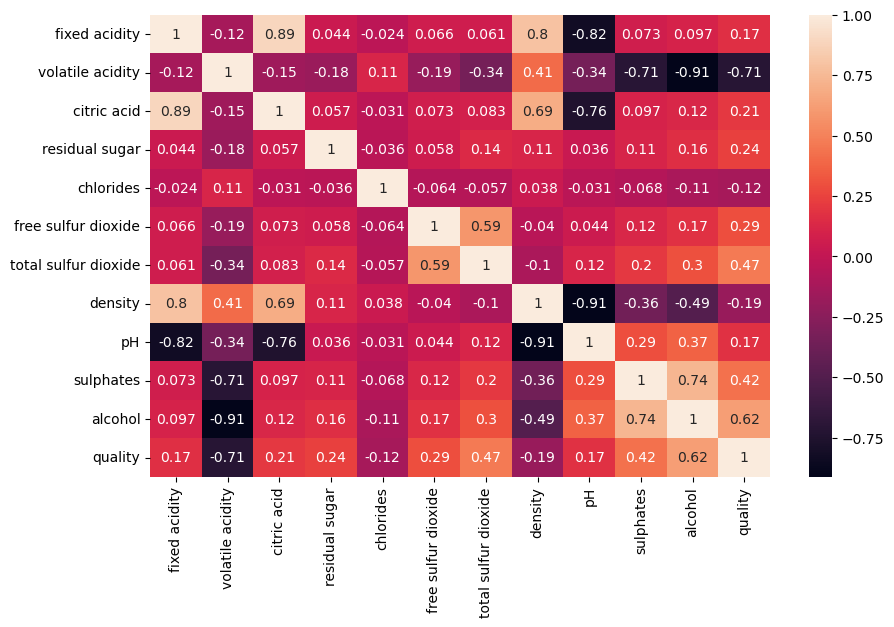

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

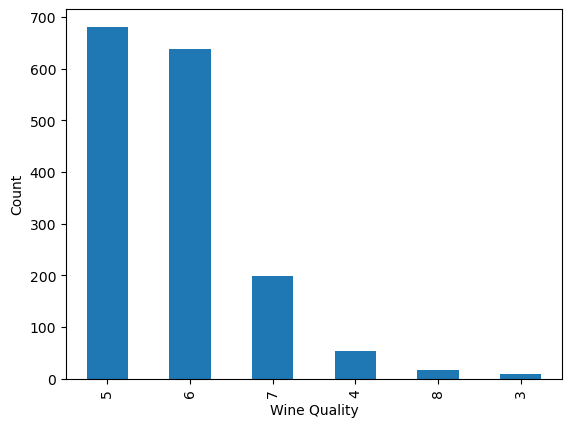

In [13]:
## Visualization
#conclusion- It is an imbalanced dataset
df.quality.value_counts().plot(kind='bar')
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.252396,0.803230,0.165013,1.589725,0.097481,11.661540,28.392565,0.996796,3.212262,0.647359,9.506666,3
1,6.741406,0.720035,0.100585,1.646685,0.084057,8.606058,35.401428,0.996515,3.302492,0.629257,9.406556,3
2,8.263395,0.776013,0.268897,1.732219,0.087643,7.306807,24.169223,0.996916,3.137254,0.514031,9.377579,3
3,8.832776,0.676016,0.300111,2.298864,0.087419,8.681127,32.106221,0.997116,3.140068,0.631564,9.603399,3
4,5.317646,0.782904,0.061717,2.156970,0.077650,2.250662,15.648956,0.996278,3.355798,0.585052,9.321775,3


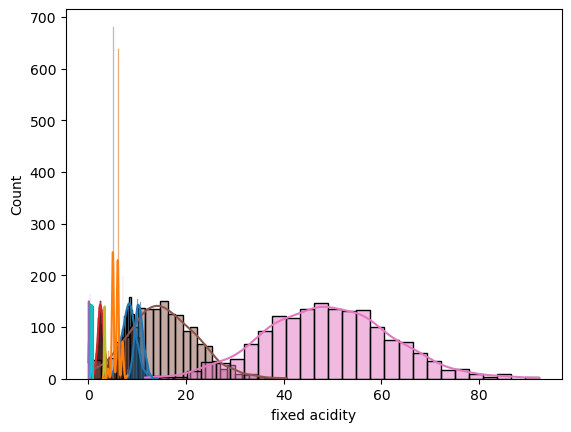

In [15]:
for column in df.columns:
    sns.histplot(df[column],kde=True)

<Axes: xlabel='alcohol', ylabel='Count'>

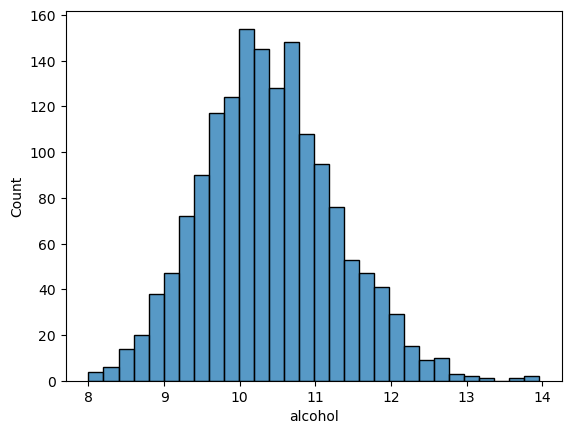

In [16]:
sns.histplot(df['alcohol'])

<Axes: >

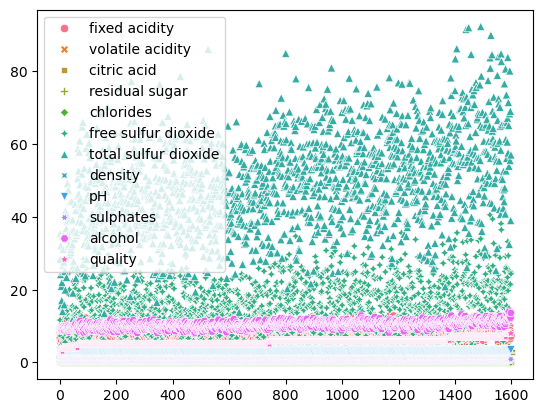

In [18]:
#univariate,bivariate,multivariate analysis
sns.scatterplot(df)

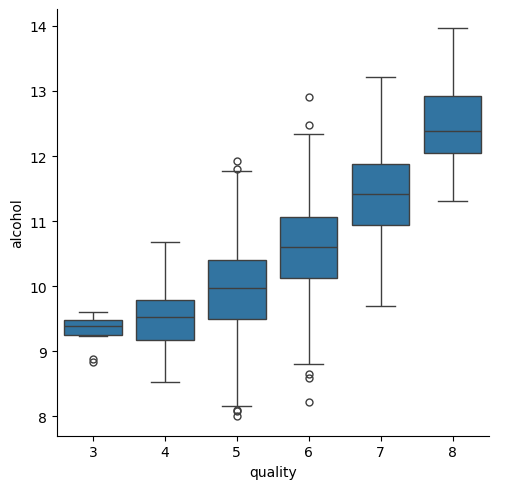

In [19]:
##categorical Plot
sns.catplot(x='quality', y='alcohol', data=df, kind="box")

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.252396,0.803230,0.165013,1.589725,0.097481,11.661540,28.392565,0.996796,3.212262,0.647359,9.506666,3
1,6.741406,0.720035,0.100585,1.646685,0.084057,8.606058,35.401428,0.996515,3.302492,0.629257,9.406556,3
2,8.263395,0.776013,0.268897,1.732219,0.087643,7.306807,24.169223,0.996916,3.137254,0.514031,9.377579,3
3,8.832776,0.676016,0.300111,2.298864,0.087419,8.681127,32.106221,0.997116,3.140068,0.631564,9.603399,3
4,5.317646,0.782904,0.061717,2.156970,0.077650,2.250662,15.648956,0.996278,3.355798,0.585052,9.321775,3


<Axes: xlabel='alcohol', ylabel='pH'>

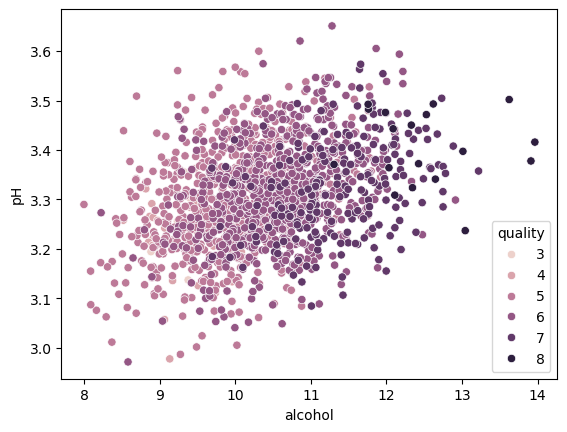

In [21]:
sns.scatterplot(x='alcohol',y='pH',hue='quality',data=df)